In [1]:
import sys
from scipy.spatial.distance import cosine
import numpy as np
import pickle
from urllib.parse import urlparse
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reading files containing urls
file_path = '../harvesting/check4facts_list.pkl'
file_path2 = '../harvesting/cyprus_list.pkl'
file_path3 = '../harvesting/greek_list.pkl'


# Deserialize the list from the file using pickle
with open(file_path, 'rb') as file:
    my_list1 = pickle.load(file)

with open(file_path2, 'rb') as file:
    my_list2 = pickle.load(file)

with open(file_path3, 'rb') as file:
    my_list3 = pickle.load(file)

In [3]:
final_list1, final_list2, final_list3 = list(), list(), list()
sources = ['twitter.com', 'www.youtube.com', 'www.facebook.com', 'm.facebook.com', 
           'greekhoaxes.com', "www.ellinikahoaxes.gr","factcheckgreek.afp.com","check4facts.gr","factcheckcyprus.org"]


for my_list, final_list in zip([my_list1,my_list2,my_list3], [final_list1,final_list2,final_list3]):
    for sub_list in my_list:
        url_list = list()
        for url in list(sub_list)[:3]:
            if not str(url).endswith("txt") and not str(url).endswith("theFile") and not '/document/' in url:
                if urlparse(url).netloc not in sources:
                    url_list.append(urlparse(url).netloc)
        final_list.append(url_list)

In [4]:
final_list1[1], final_list2[1], final_list3[1]

(['www.consilium.europa.eu', 'www.kathimerini.gr', 'www.enainstitute.org'],
 [],
 ['www.in.gr', 'www.kathimerini.gr', 'www.in.gr'])

In [5]:
flattened_list1 = [url for sublist in final_list1 for url in sublist]
flattened_list2 = [url for sublist in final_list2 for url in sublist]
flattened_list3 = [url for sublist in final_list3 for url in sublist]

In [6]:

if 'www.check4facts.gr' in flattened_list1:
    print('yes')

yes


Text(0, 0.5, 'Frequency')

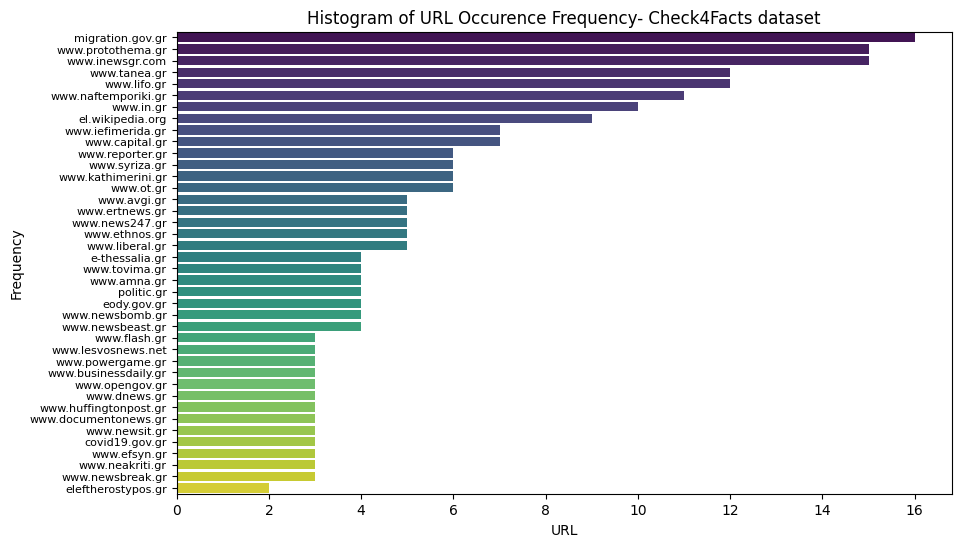

In [7]:
plt.figure(figsize=(10, 6))


# Convert the list to a pandas DataFrame
df = pd.DataFrame(flattened_list1, columns=['URL'])

# Count the occurrences of each string and select the top 10 most frequent
top_strings = df['URL'].value_counts().nlargest(40)

# Convert the series to a DataFrame for plotting
top_strings_df = top_strings.reset_index()
top_strings_df.columns = ['URL', 'Frequency']

sns.barplot(x='Frequency', y='URL', data=top_strings_df, palette='viridis')
plt.yticks(fontsize=8)

plt.title('Histogram of URL Occurence Frequency- Check4Facts dataset')
plt.xlabel('URL')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

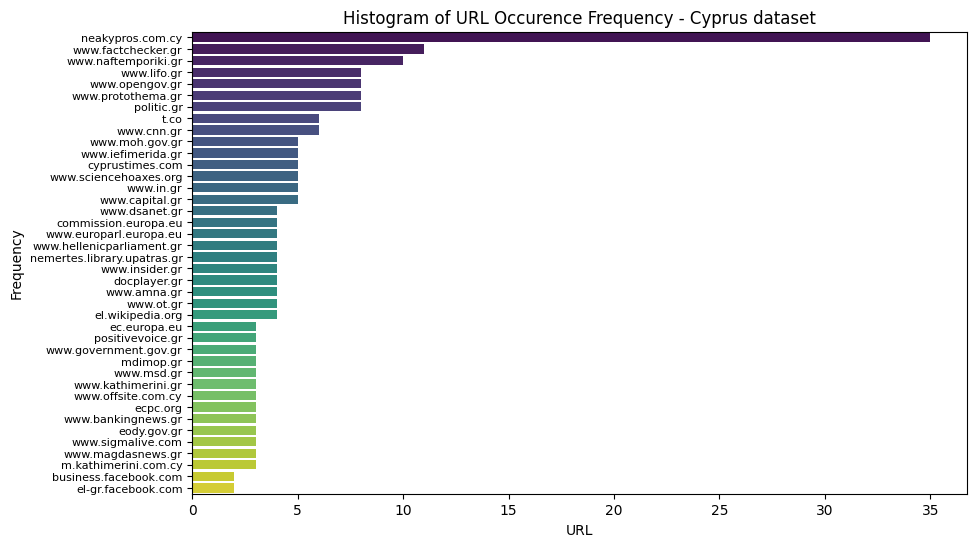

In [8]:
plt.figure(figsize=(10, 6))


# Convert the list to a pandas DataFrame
df = pd.DataFrame(flattened_list2, columns=['URL'])

# Count the occurrences of each string and select the top 10 most frequent
top_strings = df['URL'].value_counts().nlargest(40)

# Convert the series to a DataFrame for plotting
top_strings_df = top_strings.reset_index()
top_strings_df.columns = ['URL', 'Frequency']

sns.barplot(x='Frequency', y='URL', data=top_strings_df, palette='viridis')
plt.yticks(fontsize=8)

plt.title('Histogram of URL Occurence Frequency - Cyprus dataset')
plt.xlabel('URL')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

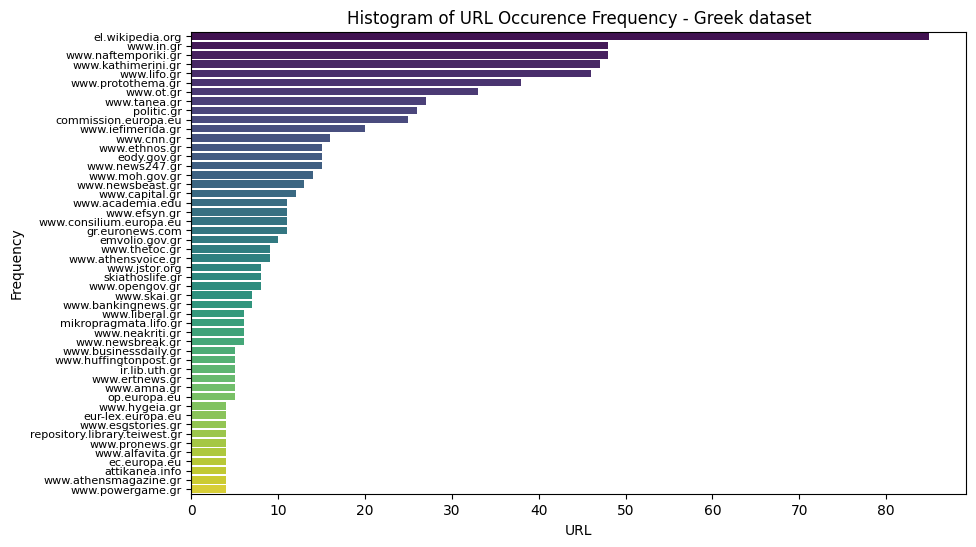

In [9]:
plt.figure(figsize=(10, 6))


# Convert the list to a pandas DataFrame
df = pd.DataFrame(flattened_list3, columns=['URL'])

# Count the occurrences of each string and select the top 10 most frequent
top_strings = df['URL'].value_counts().nlargest(50)

# Convert the series to a DataFrame for plotting
top_strings_df = top_strings.reset_index()
top_strings_df.columns = ['URL', 'Frequency']

sns.barplot(x='Frequency', y='URL', data=top_strings_df, palette='viridis')
plt.yticks(fontsize=8)

plt.title('Histogram of URL Occurence Frequency - Greek dataset')
plt.xlabel('URL')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

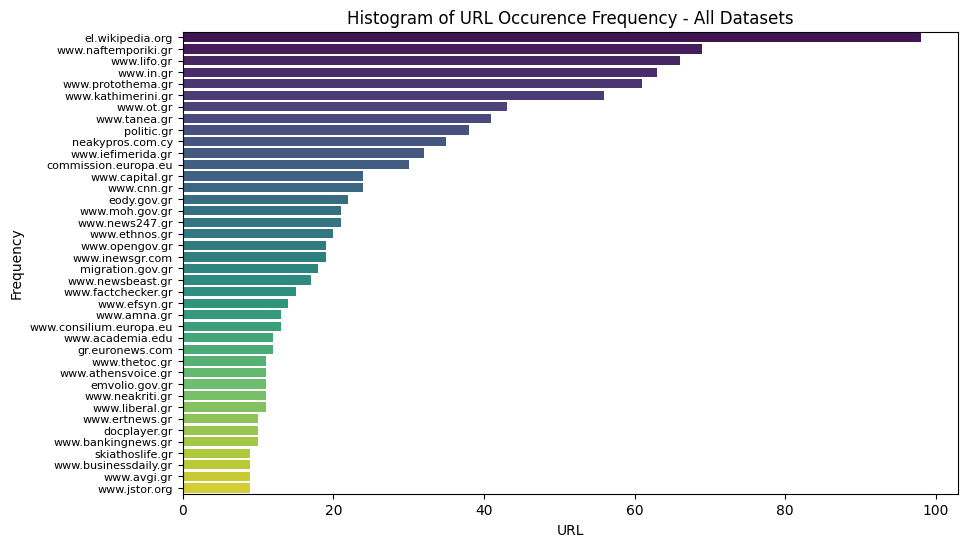

In [10]:
plt.figure(figsize=(10, 6))

flattened_list = list()
flattened_list.extend(flattened_list1)
flattened_list.extend(flattened_list2)
flattened_list.extend(flattened_list3)

# Convert the list to a pandas DataFrame
df = pd.DataFrame(flattened_list, columns=['URL'])

# Count the occurrences of each string and select the top 10 most frequent
top_strings = df['URL'].value_counts().nlargest(40)

# Convert the series to a DataFrame for plotting
top_strings_df = top_strings.reset_index()
top_strings_df.columns = ['URL', 'Frequency']

sns.barplot(x='Frequency', y='URL', data=top_strings_df, palette='viridis')
plt.yticks(fontsize=8)

plt.title('Histogram of URL Occurence Frequency - All Datasets')
plt.xlabel('URL')
plt.ylabel('Frequency')